In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline
import sklearn
from sklearn import model_selection

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

size = 5000

x_train = x_train[:size]
y_train = y_train[:size]

x_train_split, x_val_split, y_train_split, y_val_split = sklearn.model_selection.train_test_split(x_train, y_train, test_size = 0.2)

x_train_split = x_train_split / 255
x_test = x_test /  255
x_val_split = x_val_split / 255


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train_split_cat = keras.utils.to_categorical(y_train_split, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

y_val_split_cat = keras.utils.to_categorical(y_val_split, 10)

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
my_optimizer = keras.optimizers.Adam(learning_rate = 0.1)
my_optimizer_2 = keras.optimizers.SGD(learning_rate = 0.1, nesterov=True, momentum=0.0)
model.compile(optimizer=my_optimizer_2, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train_split, y_train_split_cat, validation_data= (x_val_split, y_val_split_cat) , batch_size=32, epochs=5)
# можно написать validation_data = .., train_data = ...

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3280 - accuracy: 0.9049 - val_loss: 0.2044 - val_accuracy: 0.9423
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1634 - accuracy: 0.9522 - val_loss: 0.1524 - val_accuracy: 0.9549
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1195 - accuracy: 0.9650 - val_loss: 0.1290 - val_accuracy: 0.9619
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0954 - accuracy: 0.9715 - val_loss: 0.1145 - val_accuracy: 0.9647
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0790 - accuracy: 0.9766 - val_loss: 0.1051 - val_accuracy: 0.9690


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1104 - accuracy: 0.9748


[0.11036953330039978, 0.9747999906539917]

validation split разделение обуччающей выборки на обучающую и валидирующую


In [ ]:
n = 140
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f'number: {np.argmax(res)}')
#plt.imshow(x_test[n], cmap=plt.cm.binary)
#plt.show()

1/1 [==============================] - 0s 24ms/step
[[1.9596155e-05 2.5213318e-05 1.2219625e-07 1.5876684e-09 2.9888135e-06
  6.5455833e-07 9.9994886e-01 1.1177255e-08 2.6170326e-06 5.6939314e-08]]
number: 6


In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

l = 100
r = 110

print(pred[l:r])
print(y_test[l:r])


313/313 [==============================] - 0s 1ms/step
(10000,)
[6 0 5 4 9 9 2 1 9 4]
[6 0 5 4 9 9 2 1 9 4]


In [ ]:
mask = pred == y_test

print(mask[:5])

mask = ~mask

x_false = x_test[mask]
p_false = pred[mask]
y_false = y_test[mask]

print(x_false.shape)




[ True  True  True  True  True]
(252, 28, 28)


Result: 2
Correct: 3


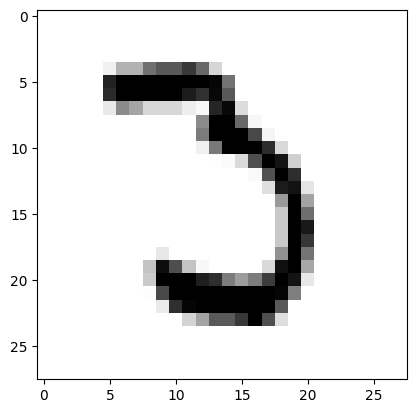

In [ ]:
num_false = 1

for i in range(num_false):
  print(f'Result: {p_false[i]}')
  print(f'Correct: {y_false[i]}')
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()